# **Importing Libraries and Dataset from Kaggle**

In [104]:
import warnings
warnings.filterwarnings('ignore')

In [105]:
pip install tensorflow

In [135]:
import os
import random
import numpy as np
import pandas as pd
from skimage import io
from skimage import color
from PIL import Image
import PIL.Image
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from dask.array.image import imread
from dask import bag, threaded
from dask.diagnostics import ProgressBar
import cv2
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

from keras import backend as K
from keras.layers import Dense, Activation, Dropout, Flatten, Input, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.applications import imagenet_utils
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Sequential, Model
from keras.utils import to_categorical
from keras.preprocessing import image
from keras.layers import Dense, Activation


In [137]:
os.getcwd()

'/content'

In [109]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bd22319","key":"7af56417df007c57915ecfecea7831a7"}'}

In [110]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [93]:
!kaggle datasets download -d alpha46663/distracted-driver-dataset

Dataset URL: https://www.kaggle.com/datasets/alpha46663/distracted-driver-dataset
License(s): unknown
100% 4.00G/4.00G [00:44<00:00, 112MB/s] 
100% 4.00G/4.00G [00:44<00:00, 97.3MB/s]


In [94]:
import zipfile

with zipfile.ZipFile('distracted-driver-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/statefarm')


In [111]:
extracted_folder_path = '/content/statefarm'
print(os.listdir(extracted_folder_path))

['imgs', 'sample_submission.csv', 'driver_imgs_list.csv']


In [96]:
driver_details = pd.read_csv('/content/statefarm/driver_imgs_list.csv')

train_image = []
image_label = []

for i in range(10):
    print('Now we are in the folder C', i)
    folder_path = f'/content/statefarm/imgs/train/c{i}'
    imgs = os.listdir(folder_path)

    for img_name in imgs:
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        img = img[50:, 120:-50]
        img = cv2.resize(img, (224, 224))
        label = i
        driver = driver_details[driver_details['img'] == img_name]['subject'].values[0]
        train_image.append([img, label, driver])
        image_label.append(label)


Now we are in the folder C 0
Now we are in the folder C 1
Now we are in the folder C 2
Now we are in the folder C 3
Now we are in the folder C 4
Now we are in the folder C 5
Now we are in the folder C 6
Now we are in the folder C 7
Now we are in the folder C 8
Now we are in the folder C 9


In [134]:
driver_details = pd.read_csv('/content/statefarm/driver_imgs_list.csv',na_values='na')
print(driver_details.head(5))

  subject classname            img
0    p002        c0  img_44733.jpg
1    p002        c0  img_72999.jpg
2    p002        c0  img_25094.jpg
3    p002        c0  img_69092.jpg
4    p002        c0  img_92629.jpg


In [113]:
import random
random.shuffle(train_image)

In [114]:
driv_selected = ['p050', 'p015', 'p022', 'p056']

In [115]:

X_train= []
y_train = []
X_test = []
y_test = []
D_train = []
D_test = []

for features,labels,drivers in train_image:
    if drivers in driv_selected:
        X_test.append(features)
        y_test.append(labels)
        D_test.append(drivers)

    else:
        X_train.append(features)
        y_train.append(labels)
        D_train.append(drivers)

print (len(X_train),len(X_test))
print (len(y_train),len(y_test))

18732 3692
18732 3692


In [138]:
X_train = np.array(X_train).reshape(-1,224,224,3)
X_test = np.array(X_test).reshape(-1,224,224,3)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print (X_train.shape)

(18732, 224, 224, 3)


# **Model and Training**

In [139]:
base_model=MobileNet(weights='imagenet',include_top=False)

In [118]:
x=base_model.output
x=GlobalAveragePooling2D()(x)

preds=Dense(10,activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=preds)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, None, None, 32)      │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, None, None, 32)      │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, None, None, 32)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, None, None, 32)      │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, None, None, 32)      │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, None, None, 32)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, None, None, 64)      │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, None, None, 64)      │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, None, None, 64)      │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, None, None, 64)      │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, None, None, 128)     │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, None, None, 128)     │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, None, None, 128)     │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, None, None, 128)     │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, None, None, 128)     │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,239,114 (12.36 MB)

 Trainable params: 3,217,226 (12.27 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [119]:
from keras import optimizers

sgd = optimizers.SGD(learning_rate=0.005)  # Adjust learning rate as needed

model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])


In [120]:
checkpointer = ModelCheckpoint('mobilenet_sgd_nolayers.keras', verbose=1, save_best_only=True)

In [121]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


checkpointer = ModelCheckpoint('mobilenet_sgd_nolayers.keras', verbose=1, save_best_only=True)
earlystopper = EarlyStopping(monitor='val_loss', patience=10, verbose=1)


datagen = ImageDataGenerator(
    height_shift_range=0.5,
    width_shift_range=0.5,
    zoom_range=0.5,
    rotation_range=30
)


datagen.fit(X_train)

data_generator = datagen.flow(X_train, y_train, batch_size=64)

steps_per_epoch = len(X_train) // 64

mobilenet_model = model.fit(data_generator,
                            steps_per_epoch=steps_per_epoch,
                            callbacks=[checkpointer, earlystopper],
                            epochs=100,
                            verbose=1,
                            validation_data=(X_test, y_test))


Epoch 1/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 667ms/step - accuracy: 0.2364 - loss: 2.1958
Epoch 1: val_loss improved from inf to 1.03217, saving model to mobilenet_sgd_nolayers.keras
292/292 ━━━━━━━━━━━━━━━━━━━━ 218s 694ms/step - accuracy: 0.2369 - loss: 2.1946 - val_accuracy: 0.6742 - val_loss: 1.0322
Epoch 2/100
  1/292 ━━━━━━━━━━━━━━━━━━━━ 51s 176ms/step - accuracy: 0.6094 - loss: 1.1699
Epoch 2: val_loss did not improve from 1.03217
292/292 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6094 - loss: 1.1699 - val_accuracy: 0.6655 - val_loss: 1.0490
Epoch 3/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 612ms/step - accuracy: 0.6446 - loss: 1.1137
Epoch 3: val_loss improved from 1.03217 to 0.66325, saving model to mobilenet_sgd_nolayers.keras
292/292 ━━━━━━━━━━━━━━━━━━━━ 186s 621ms/step - accuracy: 0.6447 - loss: 1.1134 - val_accuracy: 0.7728 - val_loss: 0.6632
Epoch 4/100
  1/292 ━━━━━━━━━━━━━━━━━━━━ 49s 169ms/step - accuracy: 0.7188 - loss: 0.7629
Epoch 4: val_loss did not improve from 0.66325

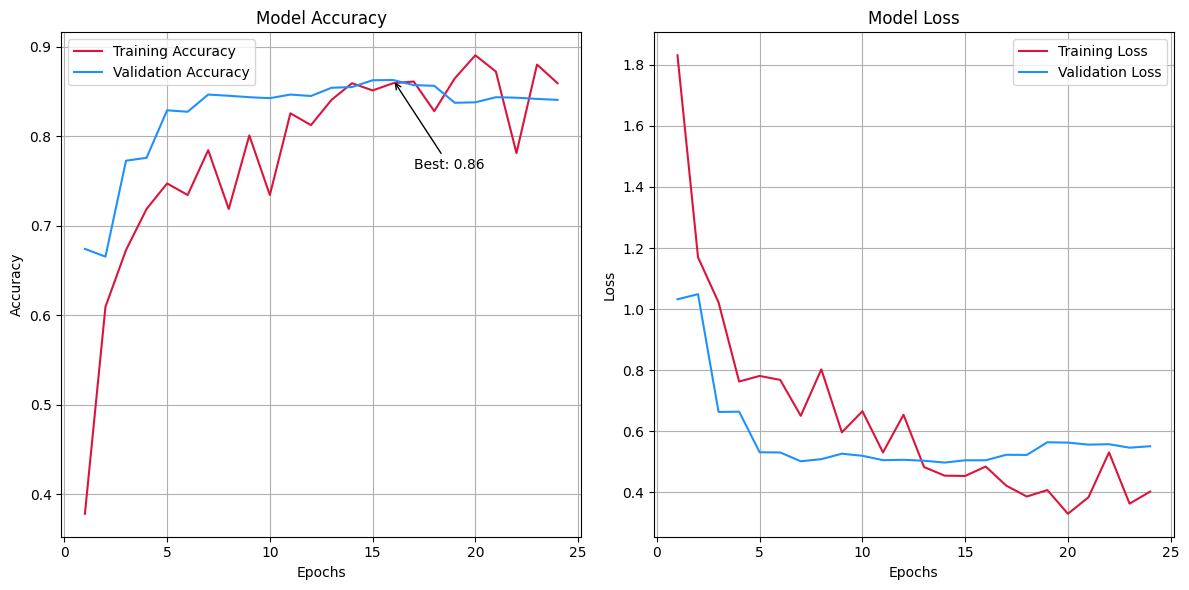

In [124]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].plot(range(1, len(model.history.history['accuracy']) + 1), model.history.history['accuracy'], color='crimson', label='Training Accuracy')
axes[0].plot(range(1, len(model.history.history['val_accuracy']) + 1), model.history.history['val_accuracy'], color='dodgerblue', label='Validation Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Model Accuracy')
axes[0].legend()
axes[0].grid(True)

best_val_acc = max(model.history.history['val_accuracy'])
best_epoch = model.history.history['val_accuracy'].index(best_val_acc) + 1
axes[0].annotate(f'Best: {best_val_acc:.2f}', xy=(best_epoch, best_val_acc), xytext=(best_epoch + 1, best_val_acc - 0.1),
                 arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)

axes[1].plot(range(1, len(model.history.history['loss']) + 1), model.history.history['loss'], color='crimson', label='Training Loss')
axes[1].plot(range(1, len(model.history.history['val_loss']) + 1), model.history.history['val_loss'], color='dodgerblue', label='Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].set_title('Model Loss')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


In [126]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, subplot_titles=("Accuracy", "Loss"))

fig.add_trace(go.Scatter(x=list(range(1, len(model.history.history['accuracy']) + 1)),
                         y=model.history.history['accuracy'],
                         mode='lines+markers',
                         name='Training Accuracy',
                         line=dict(color='crimson')),
              row=1, col=1)

fig.add_trace(go.Scatter(x=list(range(1, len(model.history.history['val_accuracy']) + 1)),
                         y=model.history.history['val_accuracy'],
                         mode='lines+markers',
                         name='Validation Accuracy',
                         line=dict(color='dodgerblue')),
              row=1, col=1)

fig.add_trace(go.Scatter(x=list(range(1, len(model.history.history['loss']) + 1)),
                         y=model.history.history['loss'],
                         mode='lines+markers',
                         name='Training Loss',
                         line=dict(color='crimson')),
              row=1, col=2)

fig.add_trace(go.Scatter(x=list(range(1, len(model.history.history['val_loss']) + 1)),
                         y=model.history.history['val_loss'],
                         mode='lines+markers',
                         name='Validation Loss',
                         line=dict(color='dodgerblue')),
              row=1, col=2)


fig.update_layout(title_text='Model Performance (Interactive Visual)', height=400, width=800)
fig.show()


# **Testing**

In [127]:
import os

test_image_path = '/content/statefarm/imgs/test/'
print(os.listdir(test_image_path))


['img_85410.jpg', 'img_79096.jpg', 'img_49861.jpg', 'img_21702.jpg', 'img_76925.jpg', 'img_75692.jpg', 'img_53632.jpg', 'img_19132.jpg', 'img_69193.jpg', 'img_13566.jpg', 'img_64916.jpg', 'img_24398.jpg', 'img_16291.jpg', 'img_685.jpg', 'img_65675.jpg', 'img_68688.jpg', 'img_30909.jpg', 'img_94059.jpg', 'img_37507.jpg', 'img_65482.jpg', 'img_55768.jpg', 'img_37187.jpg', 'img_45284.jpg', 'img_91415.jpg', 'img_580.jpg', 'img_73942.jpg', 'img_81879.jpg', 'img_245.jpg', 'img_26385.jpg', 'img_44103.jpg', 'img_5178.jpg', 'img_53214.jpg', 'img_33964.jpg', 'img_21840.jpg', 'img_67082.jpg', 'img_35821.jpg', 'img_76779.jpg', 'img_2806.jpg', 'img_31232.jpg', 'img_76893.jpg', 'img_60620.jpg', 'img_59690.jpg', 'img_15948.jpg', 'img_97251.jpg', 'img_23594.jpg', 'img_100326.jpg', 'img_77531.jpg', 'img_69804.jpg', 'img_26248.jpg', 'img_11118.jpg', 'img_94900.jpg', 'img_60205.jpg', 'img_53794.jpg', 'img_44137.jpg', 'img_68111.jpg', 'img_10578.jpg', 'img_10933.jpg', 'img_82061.jpg', 'img_41768.jpg', 'im

Image number: 0
Image number: 1
Image number: 2
Image number: 3
Image number: 4
Image number: 5
Image number: 6
Image number: 7
Image number: 8
Image number: 9
Image number: 10
Image number: 11
Image number: 12
Image number: 13
Image number: 14
Image number: 15
Image number: 16
Image number: 17
Image number: 18
Image number: 19


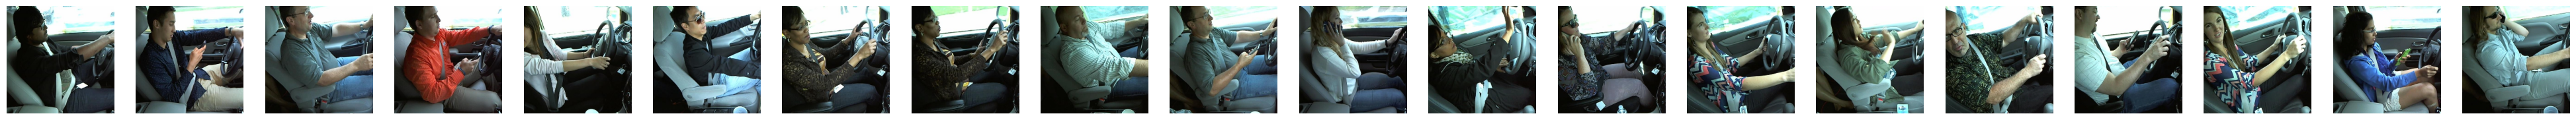

In [128]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

test_image_path = '/content/statefarm/imgs/test/'
test_image = []
fig, ax = plt.subplots(1, 20, figsize=(50, 50))

files = os.listdir(test_image_path)
valid_extensions = ('.jpg', '.jpeg', '.png')
files = [f for f in files if f.endswith(valid_extensions)]

if len(files) == 0:
    print("No valid image files found in the directory.")
else:
    nums = np.random.randint(low=0, high=len(files), size=min(20, len(files)))

    for i in range(len(nums)):
        print('Image number:', i)
        img_path = os.path.join(test_image_path, files[nums[i]])
        img = cv2.imread(img_path)


        if img is None:
            print(f"Failed to load image: {img_path}")
            continue

        img = img[50:, 120:-50]
        img = cv2.resize(img, (224, 224))
        test_image.append(img)
        ax[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax[i].axis('off')

    plt.show()


In [129]:
test = []

for img in test_image:
    test.append(img)

model.load_weights('mobilenet_sgd_nolayers.keras')


test = np.array(test).reshape(-1,224,224,3)
prediction = model.predict(test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [130]:
prediction[0]

array([0.11963702, 0.00149662, 0.00053133, 0.00604519, 0.00097725,
       0.5115306 , 0.0056784 , 0.24188551, 0.08663915, 0.02557892],
      dtype=float32)

In [131]:
tags = { "C0": "safe driving",
"C1": "texting - right",
"C2": "talking on the phone - right",
"C3": "texting - left",
"C4": "talking on the phone - left",
"C5": "operating the radio",
"C6": "drinking",
"C7": "reaching behind",
"C8": "hair and makeup",
"C9": "talking to passenger" }

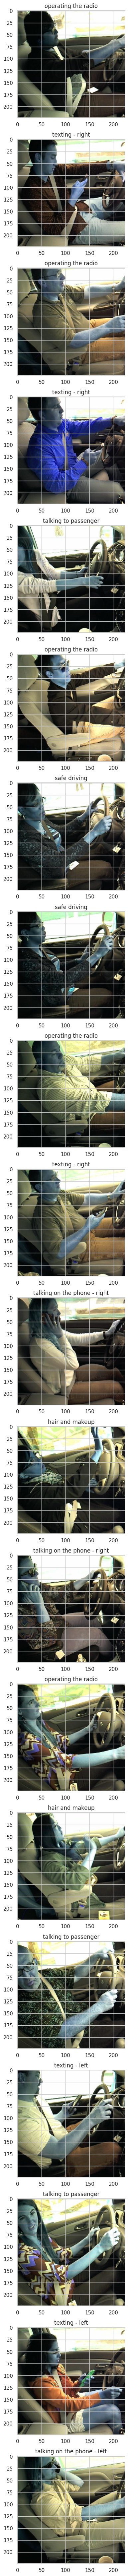

In [133]:
i = 0
fig, ax = plt.subplots(20, 1, figsize = (100,100))

for i in range(20):
    ax[i].imshow(test[i].squeeze())
    predicted_class = 'C'+str(np.where(prediction[i] == np.amax(prediction[i]))[0][0])
    ax[i].set_title(tags[predicted_class])
    plt.show

